In [2]:
ss = pdr.get_data_yahoo('005930.KS',start='2005-01-04')
msft = pdr.get_data_yahoo('msft',start='2005-01-04')

spy = pdr.get_data_yahoo('^GSPC', '2005-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2005-01-04')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


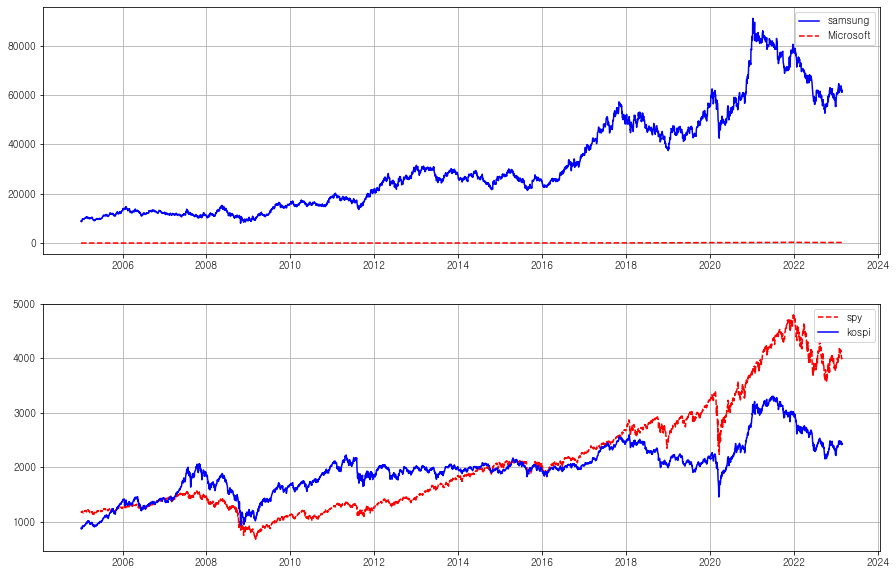

In [3]:
plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(ss.index, ss.Close, 'b', label='samsung')
plt.plot(msft.index, msft.Close, 'r--', label='Microsoft')
plt.grid(True)
plt.legend(loc='best');

plt.subplot(212)
plt.plot(spy.index, spy.Close, 'r--', label='spy')
plt.plot(kospi.index, kospi.Close, 'b', label='kospi')
plt.grid(True)
plt.legend(loc='best')
            
plt.show();

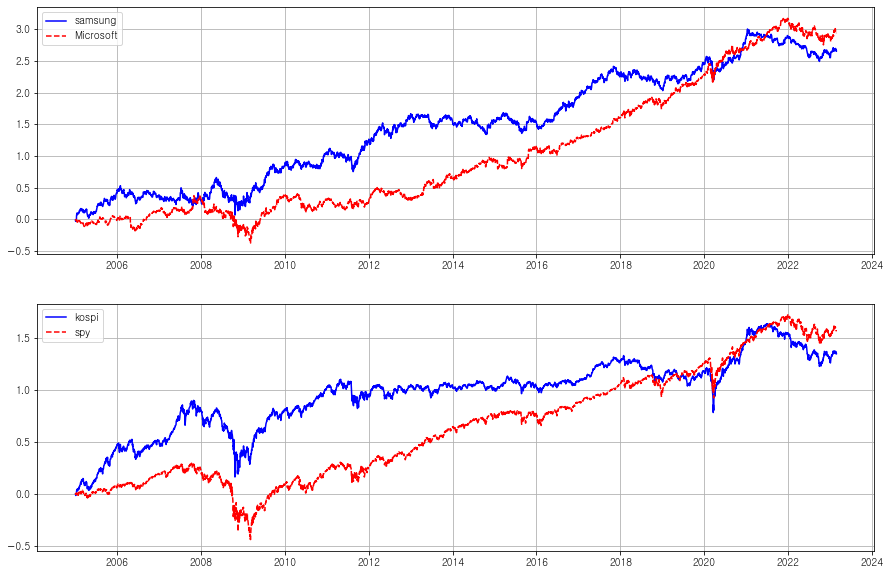

In [4]:
ss_ret_daily = ss.pct_change().cumsum()
msft_ret_daily = msft.pct_change().cumsum()
spy_ret_daily = spy.pct_change().cumsum()
kospi_ret_daily = kospi.pct_change().cumsum()

plt.figure(figsize=(15,10))

plt.subplot(211)
plt.plot(ss_ret_daily.index, ss_ret_daily.Close, 'b', label='samsung')
plt.plot(msft_ret_daily.index, msft_ret_daily.Close, 'r--', label='Microsoft')
plt.grid(True)
plt.legend(loc='best');

plt.subplot(212)
plt.plot(kospi_ret_daily.index, kospi_ret_daily.Close, 'b', label='kospi')
plt.plot(spy_ret_daily.index, spy_ret_daily.Close, 'r--', label='spy')

plt.grid(True)
plt.legend(loc='best')
            
plt.show();

In [5]:
df = pd.DataFrame({'samsung':ss['Close'], 'msft':msft['Close'], 
                   'spy':spy['Close'], 'kospi':kospi['Close']})

# 결측치 채워주기
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

In [6]:
regr_kor = stats.linregress(df['kospi'], df['samsung'])
regr_kor_line = f'Y = {regr_kor.slope:2f}X + {regr_kor.intercept:2f}'
print(regr_kor)

regr_us = stats.linregress(df['spy'], df['msft'])
regr_us_line = f'Y = {regr_us.slope:2f}X + {regr_us.intercept:2f}'
print(regr_us)

LinregressResult(slope=37.70545622298346, intercept=-42318.700910070154, rvalue=0.8871368949310642, pvalue=0.0, stderr=0.2859640535685239, intercept_stderr=578.720557145993)
LinregressResult(slope=0.07902114448577005, intercept=-84.31496389894112, rvalue=0.9584459062493231, pvalue=0.0, stderr=0.00034289297897396734, intercept_stderr=0.7967398732456978)


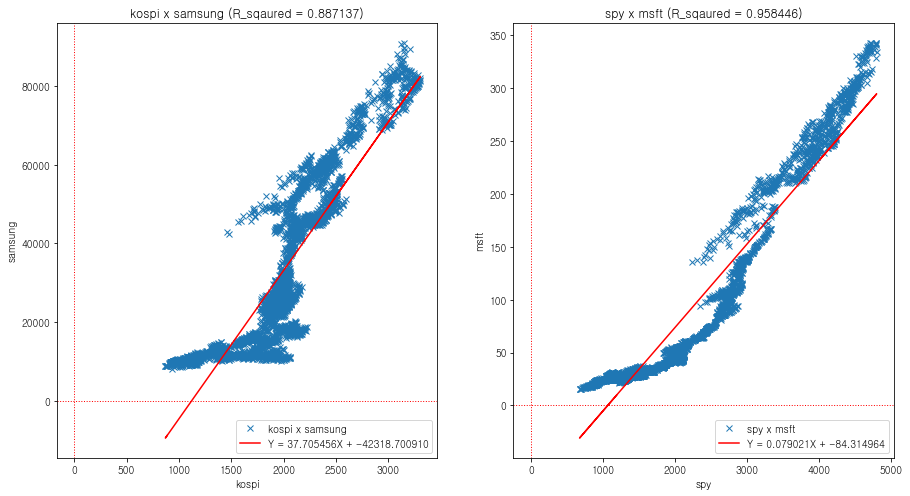

In [7]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(df.kospi, df.samsung, 'x') 
plt.plot(df.kospi, regr_kor.slope * df.kospi + regr_kor.intercept, 'r')
plt.legend(['kospi x samsung', regr_kor_line])
plt.title(f'kospi x samsung (R_sqaured = {regr_kor.rvalue:2f})')
plt.xlabel('kospi')
plt.ylabel('samsung')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)

plt.subplot(122)

plt.plot(df.spy, df.msft, 'x') 
plt.plot(df.spy, regr_us.slope * df.spy + regr_us.intercept, 'r')
plt.legend(['spy x msft', regr_us_line])
plt.title(f'spy x msft (R_sqaured = {regr_us.rvalue:2f})')
plt.xlabel('spy')
plt.ylabel('msft')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)
plt.show();

In [8]:
df.corr()

,samsung,msft,spy,kospi
samsung,1.000000,0.913662,0.958203,0.887137
msft,0.913662,1.000000,0.958446,0.760391
spy,0.958203,0.958446,1.000000,0.843425
kospi,0.887137,0.760391,0.843425,1.000000


- 주식은 장기적으로 우상향하므로 주가 그냥 쓰면 상관계수 높다

# 수익률 상관관계

In [9]:
df = pd.DataFrame({'samsung':ss['Close'], 'msft':msft['Close'], 
                   'spy':spy['Close'], 'kospi':kospi['Close']})

# 결측치 채워주기
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

# 수익률전환
df = df.pct_change().dropna()
df

,samsung,msft,spy,kospi
Date,,,,
2005-01-05,-0.008949,-0.002235,-0.003628,-0.001928
2005-01-06,-0.018059,-0.001120,0.003506,-0.015714
2005-01-07,0.012644,-0.002991,-0.001431,-0.000505
2005-01-10,-0.005675,0.004874,0.003423,0.003835
2005-01-11,0.009132,-0.002612,-0.006100,0.011565
...,...,...,...,...
2023-02-20,0.001597,-0.020887,-0.020041,0.001595
2023-02-21,-0.009569,0.000000,0.000000,0.001564
2023-02-22,-0.016103,-0.004591,-0.001574,-0.016788


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4706 entries, 2005-01-05 to 2023-02-24
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   samsung  4706 non-null   float64
 1   msft     4706 non-null   float64
 2   spy      4706 non-null   float64
 3   kospi    4706 non-null   float64
dtypes: float64(4)
memory usage: 183.8 KB


# beta

In [11]:
regr_kor = stats.linregress(df['kospi'], df['samsung'])
regr_kor_line = f'Y = {regr_kor.slope:2f}X + {regr_kor.intercept:2f}'
print(regr_kor)

regr_us = stats.linregress(df['spy'], df['msft'])
regr_us_line = f'Y = {regr_us.slope:2f}X + {regr_us.intercept:2f}'
print(regr_us)

LinregressResult(slope=1.0279496952008842, intercept=0.0002705677106286704, rvalue=0.7000772896950771, pvalue=0.0, stderr=0.015287315372895984, intercept_stderr=0.00018385539094786075)
LinregressResult(slope=1.0428767338184561, intercept=0.00027720739699831645, rvalue=0.743720973454651, pvalue=0.0, stderr=0.013667350167348736, intercept_stderr=0.00016728425754431223)


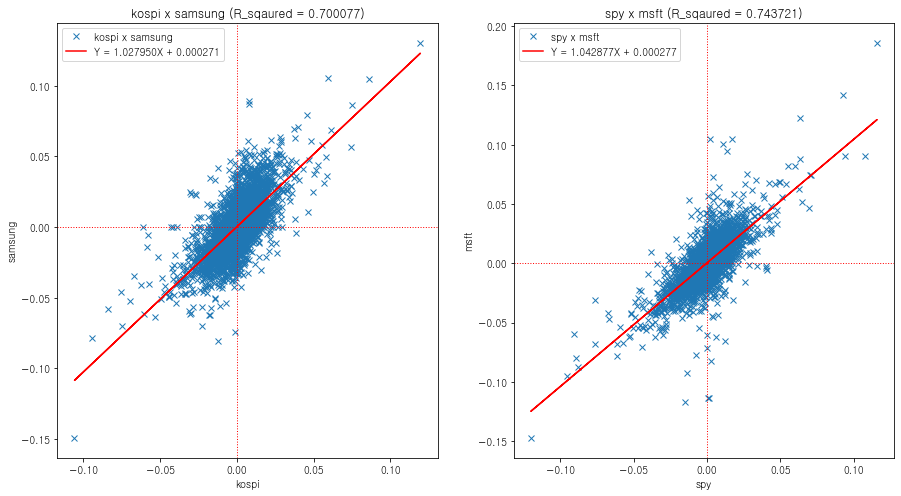

In [12]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(df.kospi, df.samsung, 'x') 
plt.plot(df.kospi, regr_kor.slope * df.kospi + regr_kor.intercept, 'r')
plt.legend(['kospi x samsung', regr_kor_line])
plt.title(f'kospi x samsung (R_sqaured = {regr_kor.rvalue:2f})')
plt.xlabel('kospi')
plt.ylabel('samsung')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)

plt.subplot(122)

plt.plot(df.spy, df.msft, 'x') 
plt.plot(df.spy, regr_us.slope * df.spy + regr_us.intercept, 'r')
plt.legend(['spy x msft', regr_us_line])
plt.title(f'spy x msft (R_sqaured = {regr_us.rvalue:2f})')
plt.xlabel('spy')
plt.ylabel('msft')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)
plt.show();

In [13]:
df.corr()

,samsung,msft,spy,kospi
samsung,1.000000,0.049464,0.119653,0.700077
msft,0.049464,1.000000,0.743721,0.133098
spy,0.119653,0.743721,1.000000,0.221451
kospi,0.700077,0.133098,0.221451,1.000000


# 주식간 인덱스간

In [14]:
regr_stock = stats.linregress(df['msft'], df['samsung'])
regr_stock_line = f'Y = {regr_stock.slope:2f}X + {regr_stock.intercept:2f}'
print(regr_stock)

regr_index = stats.linregress(df['spy'],df['kospi'])
regr_index_line = f'Y = {regr_index.slope:2f}X + {regr_index.intercept:2f}'
print(regr_index)

LinregressResult(slope=0.050898769210643076, intercept=0.0005328859231429367, rvalue=0.04946425104957387, pvalue=0.0006876949784215922, stderr=0.014984775427423668, intercept_stderr=0.0002572590430182719)
LinregressResult(slope=0.21761622789653873, intercept=0.0002135216609114961, rvalue=0.22145136323291703, pvalue=2.267180794564654e-53, stderr=0.013972053085103362, intercept_stderr=0.0001710137296617341)


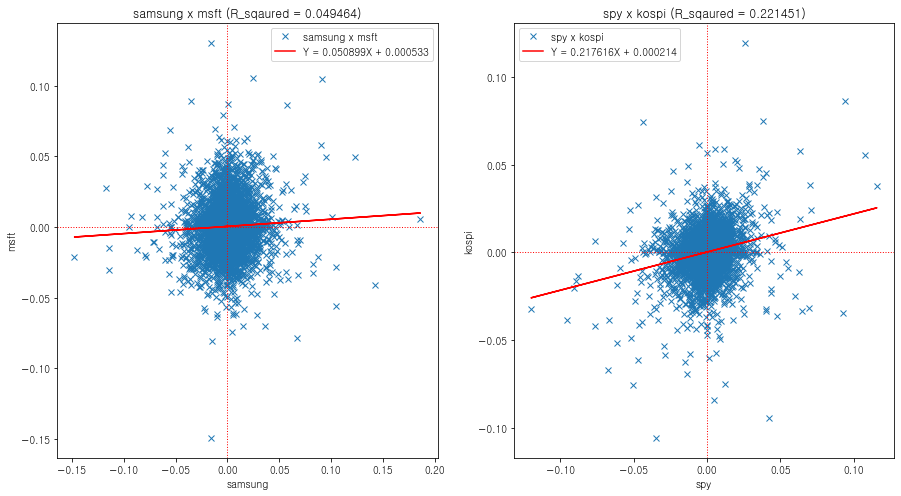

In [15]:
plt.figure(figsize=(15,8))

plt.subplot(121)
plt.plot(df.msft, df.samsung, 'x') 
plt.plot(df.msft, regr_stock.slope * df.msft + regr_stock.intercept, 'r')
plt.legend(['samsung x msft', regr_stock_line])
plt.title(f'samsung x msft (R_sqaured = {regr_stock.rvalue:2f})')
plt.xlabel('samsung')
plt.ylabel('msft')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)

plt.subplot(122)
plt.plot(df.spy, df.kospi, 'x') 
plt.plot(df.spy, regr_index.slope * df.spy + regr_index.intercept, 'r')
plt.legend(['spy x kospi', regr_index_line])
plt.title(f'spy x kospi (R_sqaured = {regr_index.rvalue:2f})')
plt.xlabel('spy')
plt.ylabel('kospi')
plt.axvline(x=0, color='r', linestyle=':', linewidth=1)
plt.axhline(y = 0, color='r', linestyle=':', linewidth=1)
plt.show();

In [16]:
df.corr()

,samsung,msft,spy,kospi
samsung,1.000000,0.049464,0.119653,0.700077
msft,0.049464,1.000000,0.743721,0.133098
spy,0.119653,0.743721,1.000000,0.221451
kospi,0.700077,0.133098,0.221451,1.000000
